# Classify gestures by reading muscle activity

**Classes dos gestos:**

*   rock - 0
*   scissors - 1
*   paper - 2
*   ok - 3





In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

**Carregamento, análise e Pré-processamento dos Dados**

In [5]:
gesto_0 = pd.read_csv('/content/0.csv', header=None)
gesto_1 = pd.read_csv('/content/1.csv', header=None)
gesto_2 = pd.read_csv('/content/2.csv', header=None)
gesto_3 = pd.read_csv('/content/3.csv', header=None)

gesto = pd.concat([gesto_0,gesto_1,gesto_2,gesto_3], axis = 0)

In [6]:
gesto.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,...,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000,11678.000000
mean,-0.520380,-0.726837,-0.739082,-0.729748,-0.159103,-0.554890,-1.272649,-0.661843,-0.665953,-0.654222,...,-0.932694,-0.836958,-0.740623,-0.768710,-0.705343,-0.146686,-0.374807,-1.449306,-0.609094,1.503254
std,18.566709,11.766878,4.989944,7.441675,17.850402,25.809528,25.089972,15.408896,18.123854,11.841260,...,15.158993,18.204465,12.005206,4.969758,7.384410,17.841479,25.551082,25.259736,15.530091,1.117541
min,-116.000000,-104.000000,-33.000000,-75.000000,-121.000000,-122.000000,-128.000000,-128.000000,-110.000000,-128.000000,...,-128.000000,-116.000000,-128.000000,-46.000000,-74.000000,-103.000000,-128.000000,-128.000000,-124.000000,0.000000
25%,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-15.000000,-6.000000,-8.000000,-9.000000,-4.000000,...,-8.000000,-9.000000,-4.000000,-3.000000,-4.000000,-10.000000,-14.000000,-6.000000,-8.000000,1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,7.000000,3.000000,2.000000,3.000000,10.000000,13.000000,4.000000,6.000000,6.000000,3.000000,...,6.000000,6.000000,3.000000,2.000000,3.000000,10.000000,13.000000,3.000000,6.000000,3.000000
max,111.000000,90.000000,34.000000,55.000000,92.000000,127.000000,127.000000,126.000000,127.000000,106.000000,...,114.000000,127.000000,105.000000,29.000000,51.000000,110.000000,127.000000,127.000000,127.000000,3.000000


In [7]:
gesto.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [8]:
gesto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11678 entries, 0 to 2921
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11678 non-null  float64
 1   1       11678 non-null  float64
 2   2       11678 non-null  float64
 3   3       11678 non-null  float64
 4   4       11678 non-null  float64
 5   5       11678 non-null  float64
 6   6       11678 non-null  float64
 7   7       11678 non-null  float64
 8   8       11678 non-null  float64
 9   9       11678 non-null  float64
 10  10      11678 non-null  float64
 11  11      11678 non-null  float64
 12  12      11678 non-null  float64
 13  13      11678 non-null  float64
 14  14      11678 non-null  float64
 15  15      11678 non-null  float64
 16  16      11678 non-null  float64
 17  17      11678 non-null  float64
 18  18      11678 non-null  float64
 19  19      11678 non-null  float64
 20  20      11678 non-null  float64
 21  21      11678 non-null  float64
 22 

**Dimensoes dos arrays bidimensionais**

In [9]:
gesto_0.shape, gesto_1.shape, gesto_2.shape, gesto_3.shape

((2910, 65), (2903, 65), (2943, 65), (2922, 65))

In [10]:
x = gesto.loc[:,0:63]
y = gesto[64]

In [11]:
x = np.array(x)
y = np.array(y)

**Normalização dos Dados**

In [12]:
x = x.reshape(x.shape[0]*x.shape[1], 1)
sc = StandardScaler()
x = sc.fit_transform(x)

**Transformação dos Rótulos**

In [13]:
y = np.eye(np.max(y) + 1)[y]

**Divisão dos Dados em Conjuntos de Treinamento e Teste**

In [14]:
x = x.reshape((-1, 8, 8))

In [15]:
print("All Data size X and y")
print(x.shape)
print(y.shape)

All Data size X and y
(11678, 8, 8)
(11678, 4)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42,stratify=y)

In [17]:
print("All Data size X and y")
print(x_train.shape)
print(y_train.shape)

All Data size X and y
(8758, 8, 8)
(8758, 4)


In [18]:
print("Test Data size X and y")
print(x_test.shape)
print(y_test.shape)

Test Data size X and y
(2920, 8, 8)
(2920, 4)


**K-Fold**

In [19]:
kf = KFold(n_splits=5, shuffle=True)
cnt = 1

In [20]:
for train_index, test_index in kf.split(x, y):
    print(f'Fold: {cnt}, Train set: {len(train_index)}, Test set: {len(test_index)}')
    cnt += 1

Fold: 1, Train set: 9342, Test set: 2336
Fold: 2, Train set: 9342, Test set: 2336
Fold: 3, Train set: 9342, Test set: 2336
Fold: 4, Train set: 9343, Test set: 2335
Fold: 5, Train set: 9343, Test set: 2335


**Definição da Arquitetura do Modelo**

Teste Simples



In [72]:
model = Sequential()
model.add(LSTM(units=32, input_shape=(x_train.shape[1], 8)))
model.add(Dropout(0.9))

model.add(Dense(units=16))
model.add(Dense(units=4, activation="softmax"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 32)                5248      
                                                                 
 dropout_22 (Dropout)        (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 4)                 68        
                                                                 
Total params: 5844 (22.83 KB)
Trainable params: 5844 (22.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

O treino é interrompido quando a "val_loss" não diminuir por 5 epochs consecutivas.

In [74]:
history=model.fit(x_train, y_train, epochs = 5, batch_size = 32, verbose=2 , callbacks=[callback],validation_split=0.6,)

Epoch 1/5
110/110 - 6s - loss: 0.6190 - accuracy: 0.2786 - val_loss: 0.5381 - val_accuracy: 0.4837 - 6s/epoch - 56ms/step
Epoch 2/5
110/110 - 1s - loss: 0.5122 - accuracy: 0.4282 - val_loss: 0.3983 - val_accuracy: 0.6206 - 1s/epoch - 10ms/step
Epoch 3/5
110/110 - 1s - loss: 0.4355 - accuracy: 0.5021 - val_loss: 0.3744 - val_accuracy: 0.6603 - 825ms/epoch - 8ms/step
Epoch 4/5
110/110 - 1s - loss: 0.4061 - accuracy: 0.5427 - val_loss: 0.3532 - val_accuracy: 0.7155 - 809ms/epoch - 7ms/step
Epoch 5/5
110/110 - 1s - loss: 0.3826 - accuracy: 0.5889 - val_loss: 0.3302 - val_accuracy: 0.7401 - 1s/epoch - 10ms/step


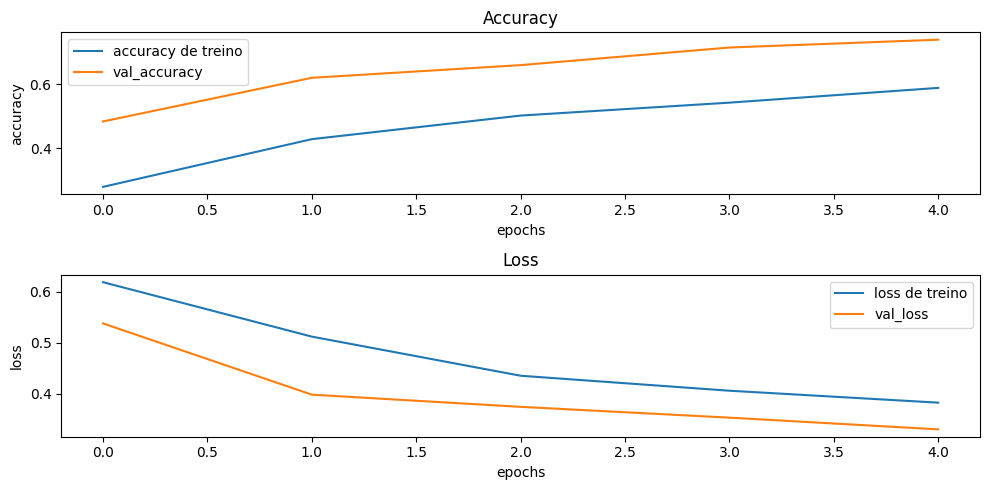

In [75]:
plt.figure(figsize=(10, 5))  # Adjust figure size for better visualization

# Gráfico de Accuracy
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(history.history['accuracy'], label='accuracy de treino')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# Gráfico de Loss
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(history.history['loss'], label='loss de treino')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()

**Aumentar complexidade do modelo**

*   Aumentar Layers
*   Aumentar o número de neurónios
*   Aumentar o número de epochs

In [45]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 8)))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64))
model.add(Dropout(0.2))

model.add(Dense(units=64))
model.add(Dense(units=128))
model.add(Dense(units=4, activation="softmax"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#As units representam o número de neurónios em cada layer

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 8, 64)             18688     
                                                                 
 dropout_15 (Dropout)        (None, 8, 64)             0         
                                                                 
 lstm_16 (LSTM)              (None, 8, 64)             33024     
                                                                 
 dropout_16 (Dropout)        (None, 8, 64)             0         
                                                                 
 lstm_17 (LSTM)              (None, 8, 64)             33024     
                                                                 
 dropout_17 (Dropout)        (None, 8, 64)             0         
                                                                 
 lstm_18 (LSTM)              (None, 64)               

**Compilação e Treinamento do Modelo**

In [43]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [47]:
history=model.fit(x_train, y_train, epochs = 15, batch_size = 32, verbose=2 , callbacks=[callback],validation_split=0.2,)

Epoch 1/15
219/219 - 6s - loss: 0.0548 - accuracy: 0.9653 - val_loss: 0.0656 - val_accuracy: 0.9521 - 6s/epoch - 25ms/step
Epoch 2/15
219/219 - 5s - loss: 0.0546 - accuracy: 0.9647 - val_loss: 0.0533 - val_accuracy: 0.9600 - 5s/epoch - 25ms/step
Epoch 3/15
219/219 - 6s - loss: 0.0514 - accuracy: 0.9677 - val_loss: 0.0751 - val_accuracy: 0.9515 - 6s/epoch - 30ms/step
Epoch 4/15
219/219 - 6s - loss: 0.0444 - accuracy: 0.9720 - val_loss: 0.0487 - val_accuracy: 0.9652 - 6s/epoch - 27ms/step
Epoch 5/15
219/219 - 5s - loss: 0.0407 - accuracy: 0.9749 - val_loss: 0.0513 - val_accuracy: 0.9640 - 5s/epoch - 23ms/step
Epoch 6/15
219/219 - 5s - loss: 0.0395 - accuracy: 0.9754 - val_loss: 0.0651 - val_accuracy: 0.9640 - 5s/epoch - 22ms/step
Epoch 7/15
219/219 - 5s - loss: 0.0358 - accuracy: 0.9790 - val_loss: 0.0500 - val_accuracy: 0.9680 - 5s/epoch - 22ms/step
Epoch 8/15
219/219 - 5s - loss: 0.0318 - accuracy: 0.9797 - val_loss: 0.0687 - val_accuracy: 0.9578 - 5s/epoch - 25ms/step
Epoch 9/15
219/2

**Visualização dos Resultados**

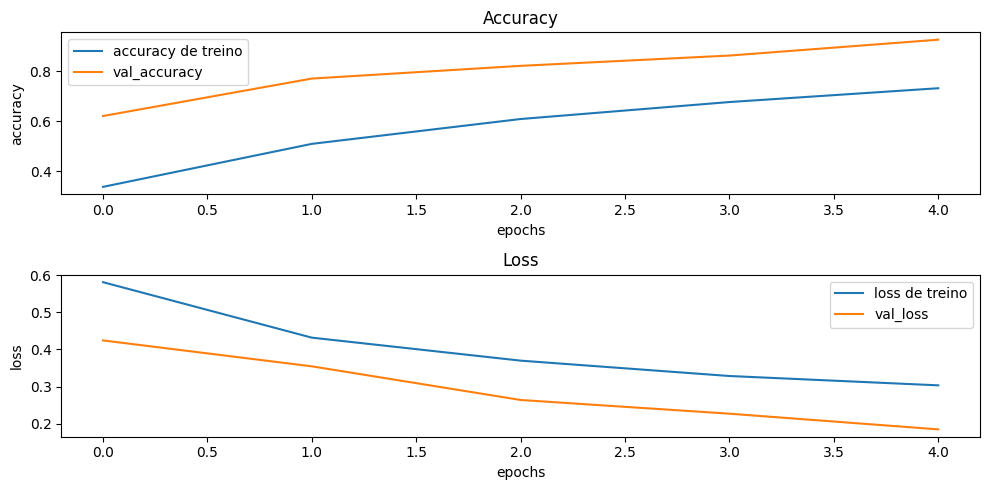

In [68]:
plt.figure(figsize=(10, 5))  # Adjust figure size for better visualization

# Gráfico de Accuracy
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(history.history['accuracy'], label='accuracy de treino')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

# Gráfico de Loss
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(history.history['loss'], label='loss de treino')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()